In [234]:
import sys, time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

%matplotlib inline

In [278]:
def linearconv(nx, nt):
    if not nx:
        nx = 50
    dx = 2 / (nx - 1)
    if not nt:
        nt = 80
    
    sigma = .1
    
    dt = sigma * dx
    c = 1

    u = np.ones(nx)
    u[int(.5/dx): int(1/dx)] = 2

    un = np.ones(nx)
    history = u.copy()

    for n in range(nt):
        un = u.copy()
        for i in range(1, nx):
            u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
        history = np.row_stack((history, u))
    return history

nx = 41
nt = 20
history = linearconv(nx, nt)

def linear_diffusion():
    nx = 41
    dx = 2 / (nx - 1)
    nt = 20
    nu = .3
    sigma = .2
    dt = sigma * dx**2 / nu
    
    u = np.ones(nx)
    u[int(0.5/dx): int(1/dx)] = 2
    history = u.copy()
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx - 1):
            u[i] = un[i] + nu * (dt / dx**2 *
                                 (un[i+1] -
                                  2 * un[i] + un[i-1]))
        history = np.vstack((history, u))
    return history

history_1 = linear_diffusion()

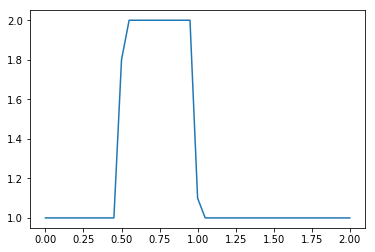

In [279]:
plt.plot(np.linspace(0, 2, nx), history[1])

In [280]:
history_1.shape

(21, 41)

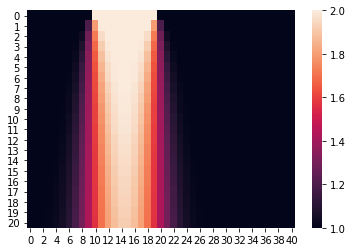

In [281]:
import seaborn as sns


sns.heatmap(history_1)

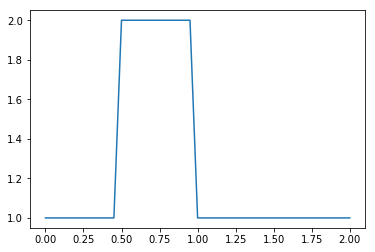

In [282]:
fig, ax = plt.subplots()
line, = ax.plot(np.linspace(0, 2, nx), history_1[0])

def animate(i):
    line.set_ydata(history_1[i])
    return line,

anim = animation.FuncAnimation(fig, animate, frames=nt, interval=20)
HTML(anim.to_html5_video())